Import cereal data and fill arrays with the data. Model will find correlation between calories and rating

In [69]:
from config import DATA_PATH
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

In [70]:

calories = []
rating = []

with open(DATA_PATH, "r", newline='') as datafile:
    reader = csv.reader(datafile, delimiter= ',')
    next(reader)
    for row in reader:
        calories.append(float(row[3]))
        rating.append(float(row[15]))

calories = np.asarray(calories)
rating = np.asarray(rating)



In [71]:
normalizer = tf.keras.layers.Normalization(axis=-1)
calories_array = np.array(calories.reshape(-1,1))
normalizer.adapt(np.array(calories_array))

first = np.array(calories[0])


with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: 70.0

Normalized: [[-1.91]]


In [72]:
calories_normalizer = layers.Normalization(input_shape=[1,], axis=None)
calories_normalizer.adapt(calories)


rating_model = tf.keras.models.Sequential([
        calories_normalizer,
        layers.Dense(units=1)
    ])



/Users/joachim/miniconda3/envs/tfenv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
calories = np.array(calories)
rating_model.predict(calories[:1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.26736176]], dtype=float32)

In [74]:
rating_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mean_absolute_error',
              metrics=['mean_squared_error'])



In [75]:
history = rating_model.fit(calories, rating, epochs=1000, verbose = 0, validation_split=0.2)

In [76]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
995,8.009219,102.452087,8.680655,135.297089,995
996,8.008024,102.384529,8.678123,135.241791,996
997,8.008369,102.370300,8.680899,135.317780,997
998,8.008530,102.401115,8.685221,135.397430,998
999,8.007725,102.467934,8.692434,135.572372,999


In [77]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)




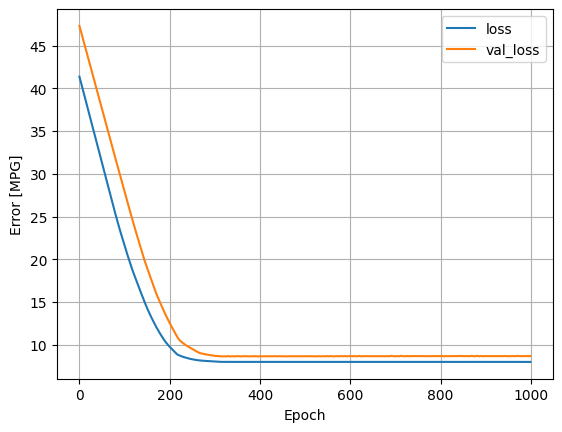

In [78]:
plot_loss(history)

In [79]:
x = tf.linspace(0.0, 250, 251)
y = rating_model.predict(x)
def plot_cereal(x, y):
  plt.scatter(calories, rating, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Calories')
  plt.ylabel('Rating')
  plt.legend()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


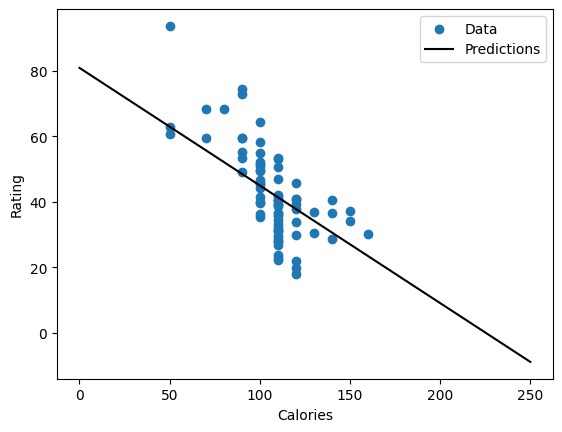

In [80]:
plot_cereal(x, y)